# Frequency Analysis of different Bird songs


In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pywt
import scipy
import wave

## Load audio files


grive.wav : 505344 samples at 44100 Hz
merle.wav : 600576 samples at 44100 Hz
mésange_charbonnière.wav : 582144 samples at 44100 Hz
pic_vert.wav : 577502 samples at 44100 Hz
pie.wav : 620032 samples at 44100 Hz
pigeon.wav : 570880 samples at 44100 Hz
pinson.wav : 630784 samples at 44100 Hz
rouge-gorge.wav : 578594 samples at 44100 Hz
sitelle_torchepot.wav : 638976 samples at 44100 Hz
tourterelle.wav : 586752 samples at 44100 Hz


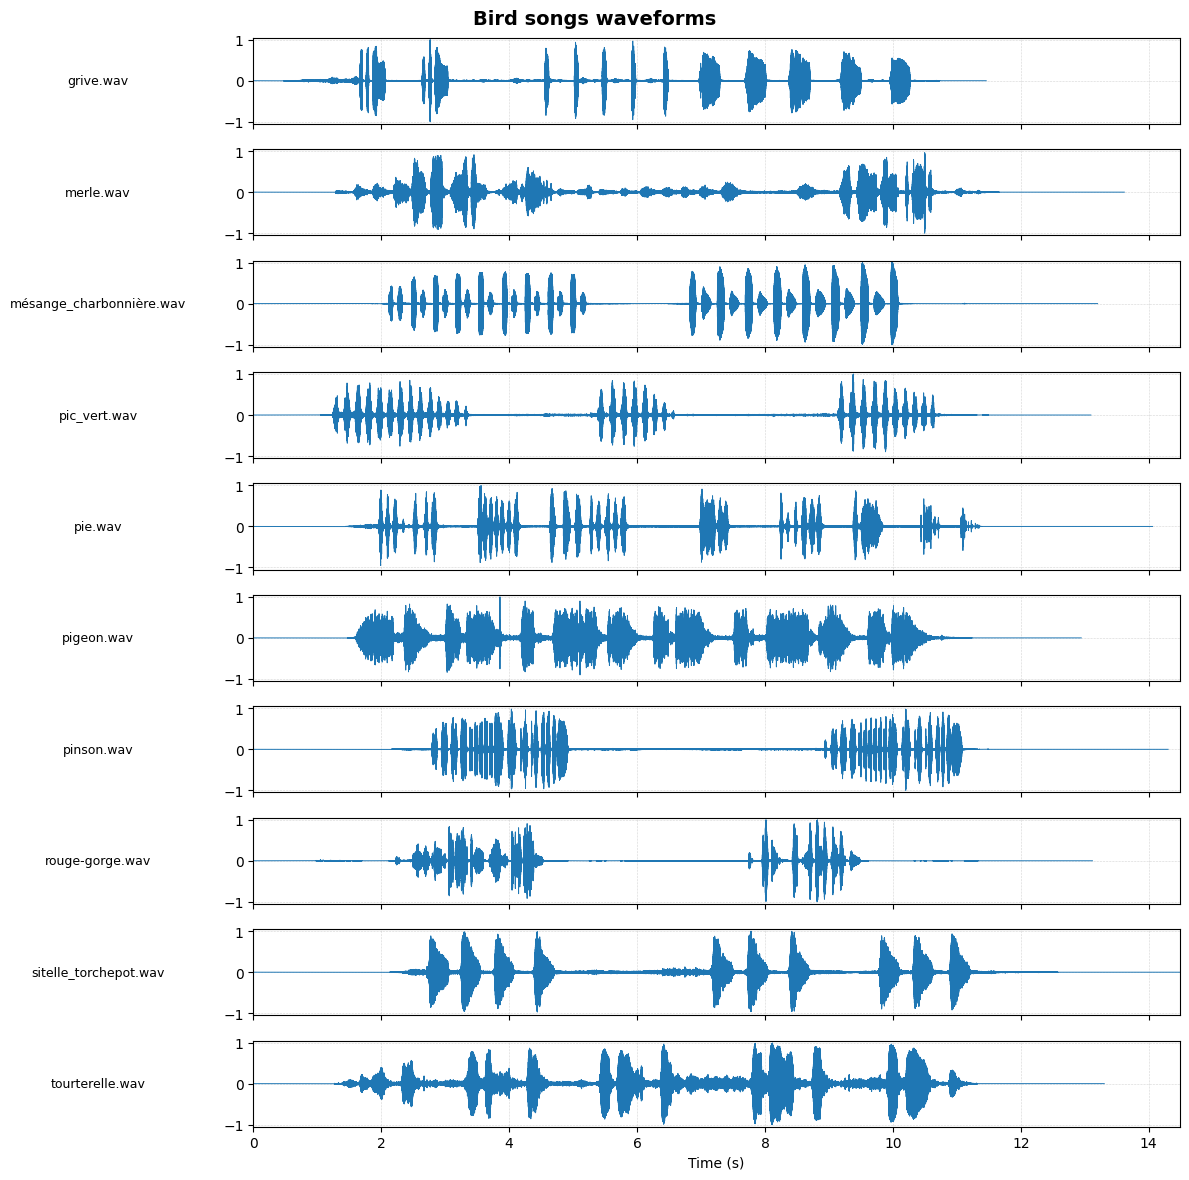

In [ ]:
bird_songs_dir = Path("./bird_songs")

wav_files = sorted(bird_songs_dir.glob("*.wav"))
if not wav_files:
    print("No .wav files found in", bird_songs_dir)
else:
    audio_list = []
    durations = []
    for path in wav_files:
        with wave.open(str(path), "rb") as wf:
            nchannels = wf.getnchannels()  # 1 for mono, 2 for stereo
            sampwidth = wf.getsampwidth()  # bytes per sample
            sr = wf.getframerate()  # sampling frequency (Hz)
            nframes = wf.getnframes()  # number of audio frames
            frames = wf.readframes(nframes)  # audio frames as bytes

        # 16-bit / 2 bytes WAV files (sampwidth == 2)
        if sampwidth != 2:
            print(f"Skipping {path.name}: expected 16-bit (2 bytes) but got {sampwidth} bytes")
            continue
        data = np.frombuffer(frames, dtype=np.int16).astype(np.float32) / 32768.0

        # Convert from stereo to mono
        if nchannels > 1:
            data = data.reshape(-1, nchannels).mean(axis=1)
        print(f"{path.name} : {nframes} samples at {sr} Hz")

        audio_list.append((path.name, sr, data))
        durations.append(len(data) / float(sr))

    if not audio_list:
        print("No compatible 16-bit .wav files found in", bird_songs_dir)
    else:
        max_dur = max(durations)
        n = len(audio_list)

        fig, axes = plt.subplots(nrows=n, ncols=1, sharex=True, figsize=(12, 1.2 * n))
        # Ensure axes is iterable
        if n == 1:
            axes = [axes]

        for ax, (fname, sr, data) in zip(axes, audio_list):
            times = np.arange(len(data)) / float(sr)
            # Normalize each track for consistent vertical scale
            data_norm = data / (np.max(np.abs(data)) + 1e-12)
            ax.plot(times, data_norm, linewidth=0.7)
            ax.set_ylabel(fname, rotation=0, labelpad=90, va="center", fontsize=9)
            ax.set_ylim(-1.05, 1.05)
            ax.grid(True, linestyle=":", linewidth=0.4)

        axes[-1].set_xlabel("Time (s)")
        for ax in axes:
            ax.set_xlim(0, max_dur)

        fig.suptitle("Bird songs waveforms", fontsize=14, fontweight="bold")
        plt.tight_layout()
        plt.show()

## Digital filtering


## Short Time Fourier Transform (STFT)


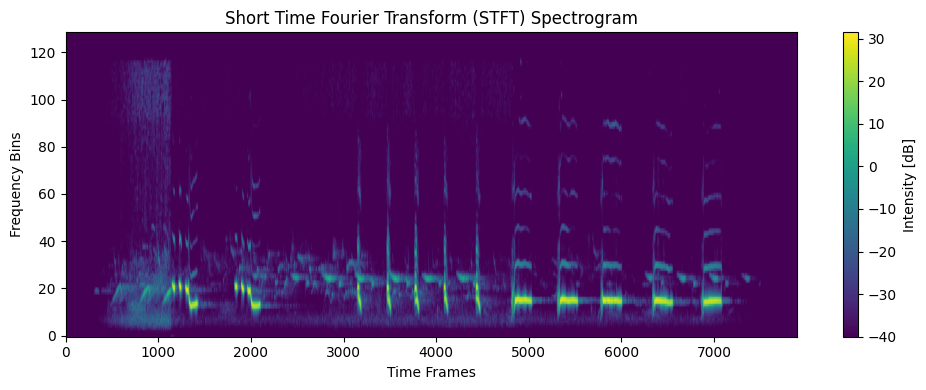

In [13]:
WINDOW_SIZE = 256
OVERLAP = 0.75
HOP_SIZE = int(WINDOW_SIZE * (1 - OVERLAP))

w = scipy.signal.windows.hann(WINDOW_SIZE)
SFT = scipy.signal.ShortTimeFFT(w, hop=HOP_SIZE, fs=sr)
SFT.stft(audio_list[0][2])  # Example on first audio file
Sx2 = SFT.spectrogram(audio_list[0][2])
Sx_dB = 10 * np.log10(np.fmax(Sx2, 1e-4))  # limit range to -40 dB

plt.figure(figsize=(10, 4))
plt.imshow(Sx_dB, aspect="auto", origin="lower", cmap="viridis")
plt.colorbar(label="Intensity [dB]")
plt.title("Short Time Fourier Transform (STFT) Spectrogram")
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bins")
plt.tight_layout()
plt.show()

## Wavelet Transform (DWT)
